# **English Hand Written Digits Recognition Using RandomForest Classifier and AdaBoost Classifier**

## Import libraries and modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import sklearn

Loading data

In [2]:
data = datasets.load_digits()

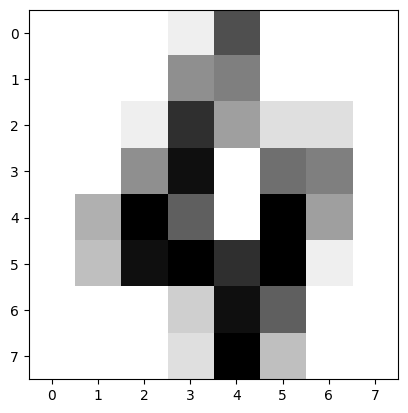

In [3]:
plt.subplot()
plt.imshow(data.images[4], cmap=plt.cm.gray_r)

In [4]:
X = data.images.reshape((len(data.images), -1))

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y = data.target

Build RandomForest Classifier, setting required hyper-parameters, on selected set of data.

In [7]:
rfc_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rfc_clf.fit(X[:1000], y[:1000])

RandomForestClassifier(n_estimators=1000, oob_score=True)

Predict selected unseen data to check the classification report.



In [8]:
p = rfc_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.95      0.89      0.92        80
           2       1.00      0.90      0.95        77
           3       0.90      0.84      0.87        79
           4       0.98      0.95      0.96        83
           5       0.90      0.99      0.94        82
           6       0.99      0.99      0.99        80
           7       0.93      1.00      0.96        80
           8       0.91      0.91      0.91        76
           9       0.85      0.93      0.89        81

    accuracy                           0.94       797
   macro avg       0.94      0.94      0.94       797
weighted avg       0.94      0.94      0.94       797



In [9]:
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 71  0  1  0  1  0  0  0  7]
 [ 1  0 69  4  0  0  0  0  0  3]
 [ 0  1  0 66  0  3  0  3  6  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  0  0  1  2  0  1 69  1]
 [ 0  0  0  2  0  3  0  0  1 75]]


In [10]:
len(e)

797

Build AdaBoost Classifier, setting required hyper-parameters, on selected set of data.

In [11]:
ada_clf = AdaBoostClassifier(estimator=SVC(probability=True, kernel='rbf'), n_estimators=100)
ada_clf.fit(X[:1000], y[:1000])

AdaBoostClassifier(estimator=SVC(probability=True), n_estimators=100)

Predict selected unseen data to check the classification report.

In [12]:
p = ada_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.87      0.91      0.89        80
           2       0.99      0.87      0.92        77
           3       0.79      0.85      0.82        79
           4       0.96      0.94      0.95        83
           5       0.96      0.93      0.94        82
           6       0.92      0.96      0.94        80
           7       0.90      0.93      0.91        80
           8       0.86      0.91      0.88        76
           9       0.85      0.81      0.83        81

    accuracy                           0.90       797
   macro avg       0.91      0.90      0.90       797
weighted avg       0.91      0.90      0.91       797

